In [1]:
import numpy as np
from PIL import Image
import cv2

import matplotlib.pyplot as plt

In [4]:
files = [
    '../data/cathedral/d001.jpg' ,
    '../data/cathedral/d002.jpg',
    '../data/cathedral/d003.jpg',
    '../data/cathedral/d004.jpg',
    '../data/cathedral/d005.jpg',
    '../data/cathedral/result.png'
]

images = [cv2.imread(x, 1) for x in files]

images, target = images[:-1], images[-1]

In [39]:
def imshow(images: np.array) -> None:
    """Display images in jupyter notebook

    :param images: array with images
    :type images: np.array
    """
    images = images.clip(0, 255).astype('uint8')
    if images.ndim == 3:
        if images.shape[2] == 4:
            images = cv2.cvtColor(images, cv2.COLOR_BGRA2RGBA)
        else:
            images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(images))

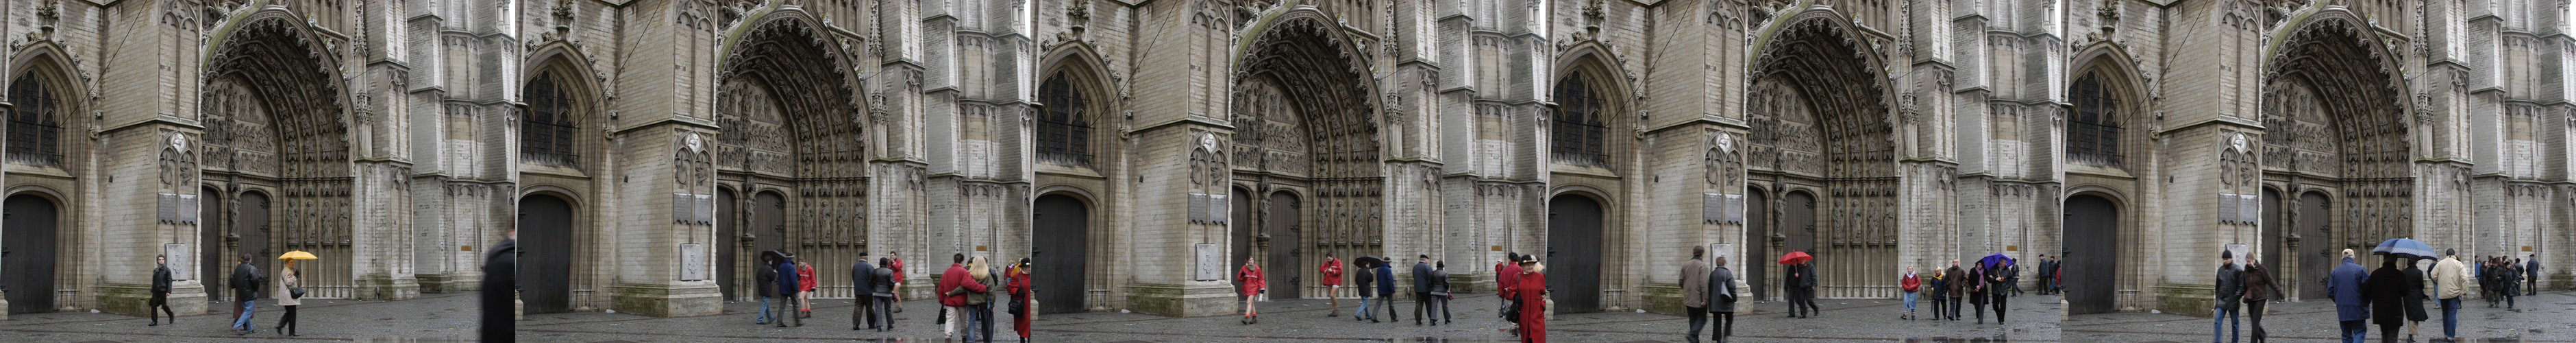

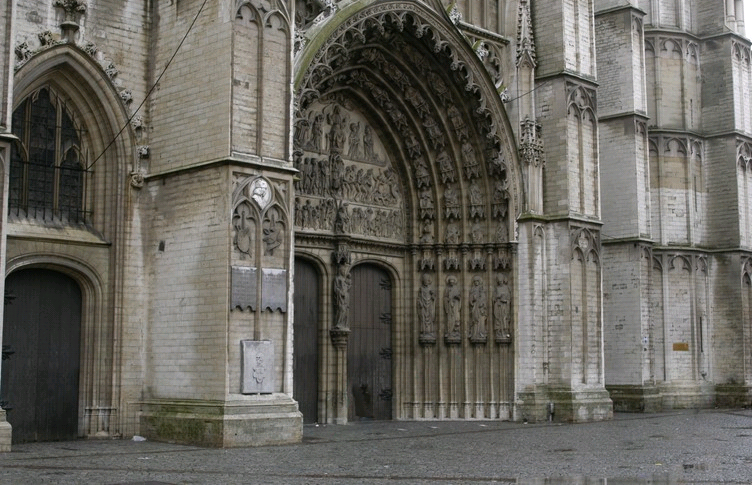

In [95]:
imshow(np.concatenate(images, 1))
imshow(target)

As we can see target image is shifted up and there is white stripe at the bottom of the image. We've manually checked and the white stripe has height 15px. To compare images with the target picture, we remove that part from the picture. The missing upper part of the image was taken from any other picture from the dataset.

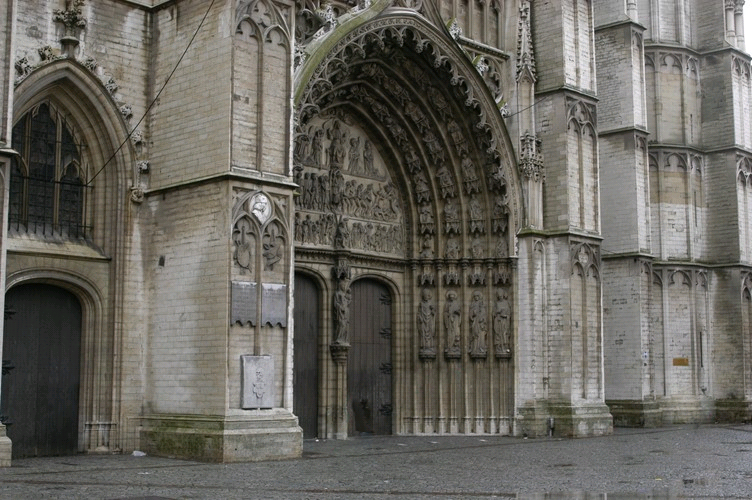

In [96]:
target = target[:485]
target = np.concatenate((images[0][:15], target), axis=0)
imshow(target)

# Analysis of background areas covered by images with people in the foreground #

In below analysis, we compare each image separately with target image. Pixels are considered the same if no channel differs by more than 20. Pixels which are the same are marked in white and those which are different among the images are in black.

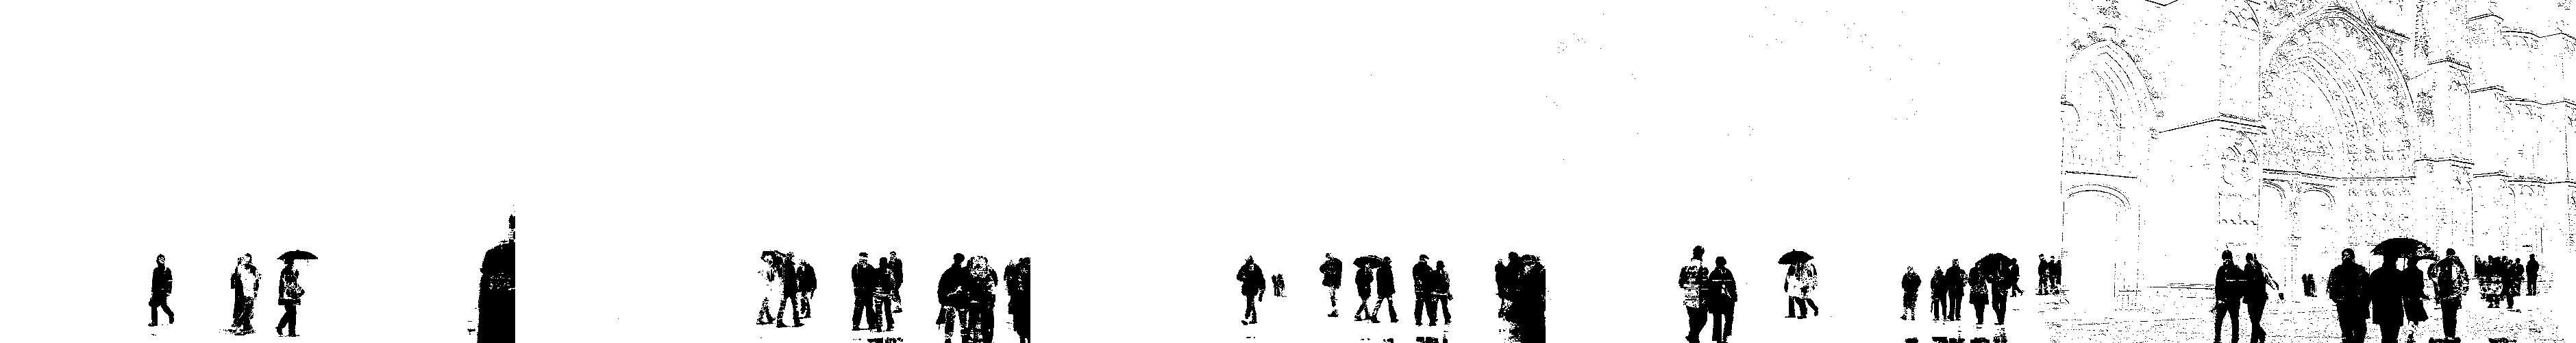

In [97]:
first_diff = np.all(np.isclose(images[0], target, atol=20, rtol=0.1).astype(int), axis=2).astype(np.uint8)
second_diff = np.all(np.isclose(images[1], target, atol=20, rtol=0.1).astype(int), axis=2).astype(np.uint8)
third_diff = np.all(np.isclose(images[2], target, atol=20, rtol=0.1).astype(int), axis=2).astype(np.uint8)
fourth_diff = np.all(np.isclose(images[3], target, atol=20, rtol=0.1).astype(int), axis=2).astype(np.uint8)
fifth_diff = np.all(np.isclose(images[4], target, atol=20, rtol=0.1).astype(int), axis=2).astype(np.uint8)

imshow(np.concatenate([first_diff, second_diff, third_diff, fourth_diff, fifth_diff], 1) * 255)


Based on above visualization we can also observe, that fifth image is slightly shifted (probably horizontally)

In [98]:
combined_areas = first_diff + second_diff + third_diff + fourth_diff + fifth_diff

### Areas identical to the target image in all images ###
Again pixels which are the same for all images are in white 

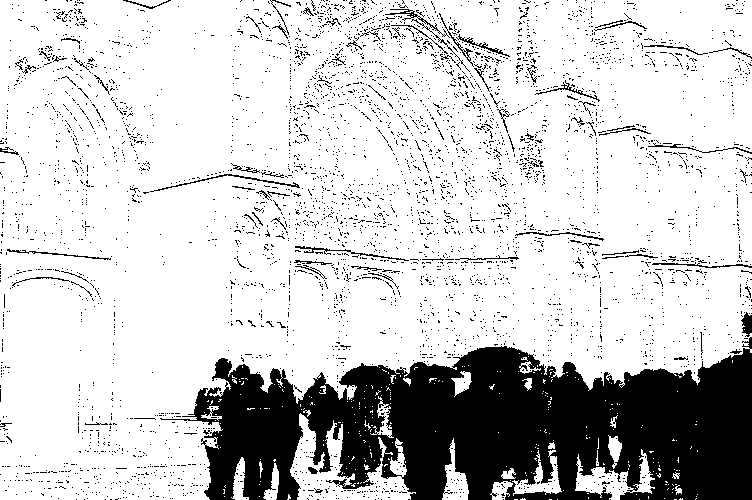

In [99]:
two_images_cover = np.zeros(shape=(500, 752))
two_images_cover[combined_areas == 5] = 1
imshow(two_images_cover.astype(np.uint8) * 255)

<b> Remark </b> <br>
White contours at the edges of the building occurs because of the shifted fifth image (All images except fifth one has there the same value as the target image).

### Areas covered by only one image ###
(In white areas four images have value the same as the target image)



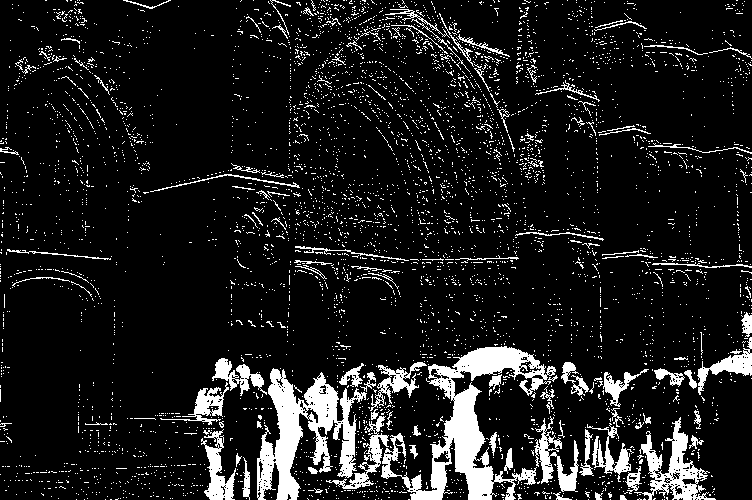

In [100]:
two_images_cover = np.zeros(shape=(500, 752))
two_images_cover[combined_areas == 4] = 1
imshow(two_images_cover.astype(np.uint8) * 255)

### Areas covered by two images ### 
(In white areas three images have value the same as the target image)

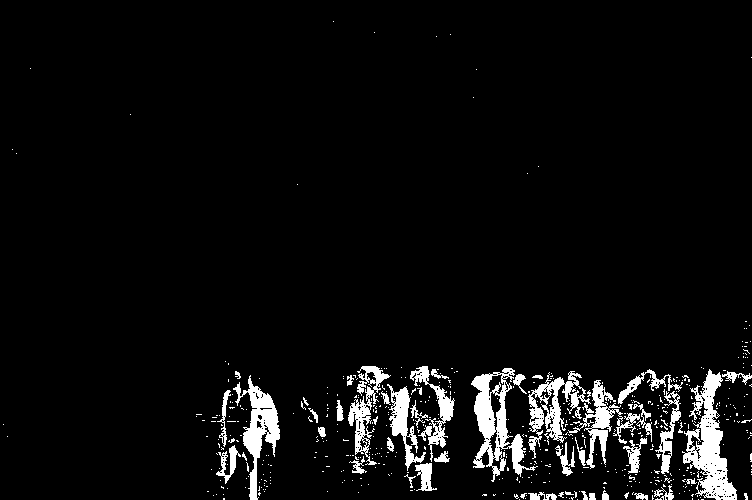

In [101]:
two_images_cover = np.zeros(shape=(500, 752))
two_images_cover[combined_areas == 3] = 1
imshow(two_images_cover.astype(np.uint8) * 255)

### Areas covered by three images ###
(In white areas only two images has value the same as the target image)

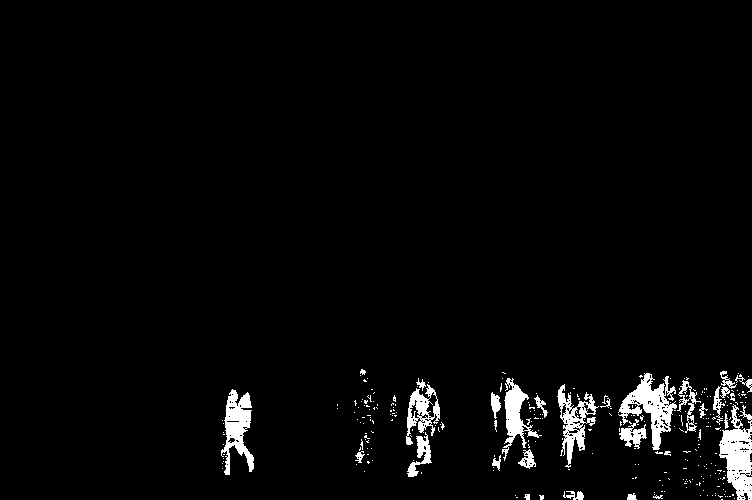

In [102]:
three_images_cover = np.zeros(shape=(500, 752))
three_images_cover[combined_areas == 2] = 1
imshow(three_images_cover.astype(np.uint8) * 255)

### Areas covered by four images ###
(In white areas only one image has value the same as the target image)

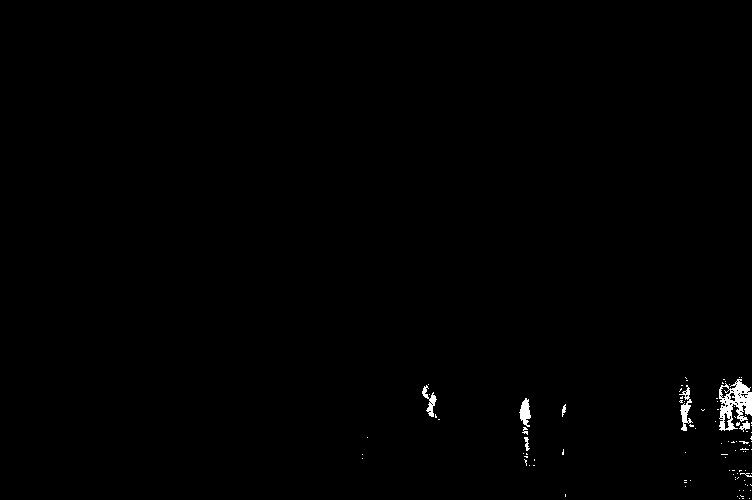

In [103]:
four_images_cover = np.zeros(shape=(500, 752))
four_images_cover[combined_areas == 1] = 1
imshow(four_images_cover.astype(np.uint8) * 255)

### Areas covered by five images ###
(In white areas none of the images has the same color as the target image)

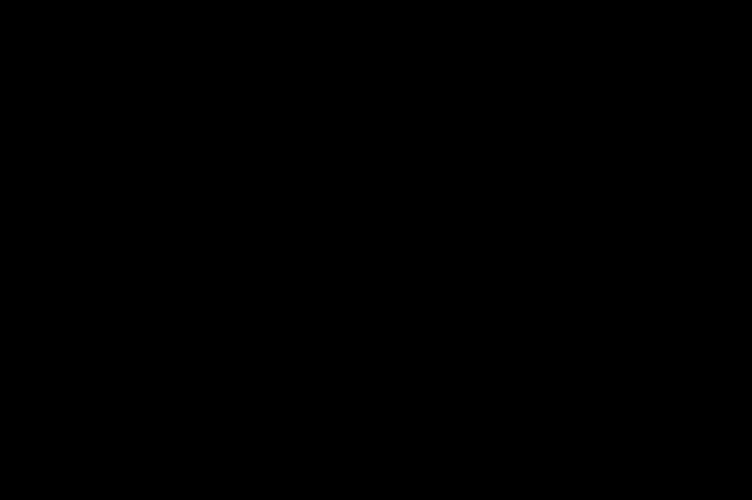

In [104]:
five_images_cover = np.zeros(shape=(500, 752))
five_images_cover[combined_areas == 0] = 1
imshow(five_images_cover.astype(np.uint8) * 255)

Fortunately, each pixel has a proper value in at least one image with moving objects.